In [6]:
import matplotlib.pyplot as plt
from mxnet import nd, autograd, init, context, gluon
from mxnet.gluon import nn
from IPython import display
import re
import collections

In [7]:
def read_time_machine():
    with open('./data/timemachine.txt', 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line.strip().lower()) for line in lines]

In [8]:
lines = read_time_machine()
print(lines[:5])

['the time machine by h g wells ', '', '', '', '']


In [9]:
def tokenize(lines):
    tokens = [line.split(' ') for line in lines]
    return tokens

In [10]:
tokens = tokenize(lines)
print(tokens[:2])

[['the', 'time', 'machine', 'by', 'h', 'g', 'wells', ''], ['']]


In [11]:
def count_freqs(lines):
    flat = [tk for line in lines for tk in line ]
    return collections.Counter(flat)

In [12]:
token_freqs = count_freqs(tokens)
print(list(token_freqs.items())[:4])

[('the', 2261), ('time', 200), ('machine', 85), ('by', 103)]


In [42]:
class Vocab(object):
    def __init__(self, tokens, min_freq=0):
        self.token_freqs = count_freqs(tokens)
        self.token_freqs = sorted(self.token_freqs.items(), key=lambda x:x[0])
        self.token_freqs = sorted(self.token_freqs, key=lambda x:x[1], reverse=True)
        
        self.unq, self.unq_tokens = 0, ['<unk>']
        self.unq_tokens += [token for token, freq in self.token_freqs if freq > min_freq]
        self.idx_to_tokens, self.tokens_to_idx = [], dict()
        
        for token in self.unq_tokens:
            self.idx_to_tokens.append(token)
            self.tokens_to_idx[token] = len(self.idx_to_tokens) - 1
        
    @staticmethod
    def count_freqs(lines):
        flat = [tk for line in lines for tk in line ]
        return collections.Counter(flat)
    
    def __len__(self):
        return len(self.idx_to_tokens)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.tokens_to_idx[tokens]
        return [self.tokens_to_idx[token] for token in tokens]
    
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_tokens[indices]
        return [self.idx_to_tokens[index] for index in indices]

In [43]:
lines = read_time_machine()
tokens = tokenize(lines)
vocab = Vocab(tokens)

In [44]:
print(vocab.token_freqs[:5])

[('the', 2261), ('', 1282), ('i', 1267), ('and', 1245), ('of', 1155)]


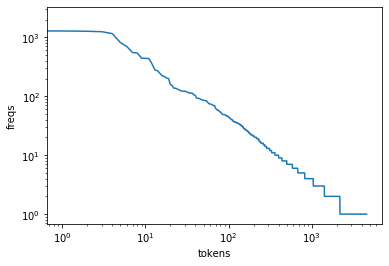

In [45]:
freqs = [freq for token, freq in vocab.token_freqs]
axes = plt.gca()
axes.plot(range(len(freqs)), freqs)
axes.set_xlabel('tokens')
axes.set_ylabel('freqs')
axes.set_xscale('log')
axes.set_yscale('log')

In [48]:
bigram_tokens = [[pair for pair in zip(line[:-1], line[1:])] for line in tokens]
bigram_vocab = Vocab(bigram_tokens)

In [49]:
print(bigram_vocab.token_freqs[:5])

[(('of', 'the'), 297), (('in', 'the'), 161), (('i', 'had'), 126), (('and', 'the'), 104), (('i', 'was'), 104)]


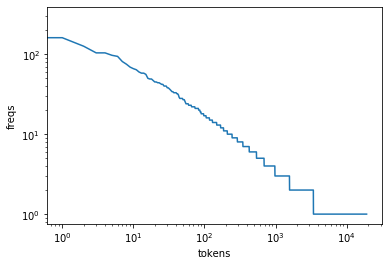

In [50]:
freqs = [freq for token, freq in bigram_vocab.token_freqs]
axes = plt.gca()
axes.plot(range(len(freqs)), freqs)
axes.set_xlabel('tokens')
axes.set_ylabel('freqs')
axes.set_xscale('log')
axes.set_yscale('log')